In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../data/final_dataset.csv")

In [3]:
df.head()

,id,application_id,application_hour,application_day_of_week,account_open_year,preferred_contact,referral_code,account_status_code,random_noise_1,num_login_sessions,...,recent_inquiry_count,num_public_records,num_collections,account_diversity_index,age,annual_income,employment_length,employment_type,education,marital_status
0,10000,620515,5,6,2013,Email,REF0000,ACT-2,1.137,13,...,2,1,0,0.499,41,61800.0,2.2,full-time,Graduate,Married
1,10001,624978,4,2,2015,Phone,REF0000,ACT-3,-0.165,6,...,6,0,0,0.298,38,28600.0,7.0,full-time,High School,Married
2,10002,564658,10,3,2020,Phone,REF0000,ACT-3,0.527,1,...,2,0,0,0.174,18,20700.0,0.8,full-time,Bachelor,Single
3,10003,621493,7,5,2010,Email,REF0000,A01,-0.710,4,...,1,0,0,0.263,27,31400.0,4.8,full-time,Bachelor,Single
4,10004,637785,1,2,2020,Email,REF0000,ACT-3,-0.603,6,...,1,0,0,0.298,26,24600.0,5.2,full-time,High School,Single


In [4]:
df.shape

(89999, 51)

In [5]:
df.isna().sum()

id                            0
application_id                0
application_hour              0
application_day_of_week       0
account_open_year             0
preferred_contact             0
referral_code                 0
account_status_code           0
random_noise_1                0
num_login_sessions            0
num_customer_service_calls    0
has_mobile_app                0
paperless_billing             0
default                       0
monthly_income                0
monthly_payment               0
debt_to_income_ratio          0
debt_service_ratio            0
payment_to_income_ratio       0
credit_utilization            0
revolving_balance             0
credit_usage_amount           0
available_credit              0
total_monthly_debt_payment    0
annual_debt_payment           0
loan_to_annual_income         0
total_debt_amount             0
housing_price_index           0
loan_type                     0
loan_amount                   0
loan_term                     0
interest

In [6]:
df.duplicated().sum()


np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89999 entries, 0 to 89998
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          89999 non-null  int64  
 1   application_id              89999 non-null  int64  
 2   application_hour            89999 non-null  int64  
 3   application_day_of_week     89999 non-null  int64  
 4   account_open_year           89999 non-null  int64  
 5   preferred_contact           89999 non-null  object 
 6   referral_code               89999 non-null  object 
 7   account_status_code         89999 non-null  object 
 8   random_noise_1              89999 non-null  float64
 9   num_login_sessions          89999 non-null  int64  
 10  num_customer_service_calls  89999 non-null  int64  
 11  has_mobile_app              89999 non-null  int64  
 12  paperless_billing           89999 non-null  int64  
 13  default                     899

In [8]:
df.nunique()

id                            89999
application_id                89999
application_hour                 24
application_day_of_week           7
account_open_year                14
preferred_contact                 2
referral_code                  7805
account_status_code               5
random_noise_1                 5697
num_login_sessions               32
num_customer_service_calls       12
has_mobile_app                    2
paperless_billing                 2
default                           2
monthly_income                 2552
monthly_payment               58173
debt_to_income_ratio           2489
debt_service_ratio            89670
payment_to_income_ratio        2273
credit_utilization              980
revolving_balance             71502
credit_usage_amount           71502
available_credit              74539
total_monthly_debt_payment    79123
annual_debt_payment           79832
loan_to_annual_income         67933
total_debt_amount             86492
housing_price_index         

In [9]:
df.describe()

,id,application_id,application_hour,application_day_of_week,account_open_year,random_noise_1,num_login_sessions,num_customer_service_calls,has_mobile_app,paperless_billing,...,total_credit_limit,num_delinquencies_2yrs,num_inquiries_6mo,recent_inquiry_count,num_public_records,num_collections,account_diversity_index,age,annual_income,employment_length
count,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,...,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.00000,89999.000000,89999.000000,89999.000000,89999.000000
mean,54999.000000,594846.054934,11.475539,2.993755,2016.497517,0.000091,8.814387,1.994544,0.713308,0.620262,...,91483.424260,0.019145,1.495183,1.495183,0.072612,0.03120,0.310799,38.715041,47586.732075,5.376835
std,25980.617776,28850.062092,6.901162,2.005926,4.020588,0.997135,3.823459,1.413004,0.452219,0.485324,...,67988.308788,0.138165,1.225129,1.225129,0.259500,0.17386,0.100995,10.805176,26691.159740,3.340101
min,10000.000000,544794.000000,0.000000,0.000000,2010.000000,-4.091000,1.000000,0.000000,0.000000,0.000000,...,10000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.001000,18.000000,20000.000000,0.000000
25%,32499.500000,569870.500000,6.000000,1.000000,2013.000000,-0.672000,6.000000,1.000000,0.000000,0.000000,...,45100.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.240000,31.000000,28100.000000,2.800000
50%,54999.000000,594901.000000,11.000000,3.000000,2017.000000,0.003000,8.000000,2.000000,1.000000,1.000000,...,72300.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.309000,38.000000,41100.000000,5.100000
75%,77498.500000,619775.500000,17.000000,5.000000,2020.000000,0.669000,11.000000,3.000000,1.000000,1.000000,...,117800.000000,0.000000,2.000000,2.000000,0.000000,0.00000,0.380000,46.000000,59300.000000,7.600000
max,99998.000000,644793.000000,23.000000,6.000000,2023.000000,5.236000,34.000000,11.000000,1.000000,1.000000,...,500000.000000,2.000000,10.000000,10.000000,1.000000,1.00000,0.756000,74.000000,487200.000000,23.900000


In [10]:
df.head()

,id,application_id,application_hour,application_day_of_week,account_open_year,preferred_contact,referral_code,account_status_code,random_noise_1,num_login_sessions,...,recent_inquiry_count,num_public_records,num_collections,account_diversity_index,age,annual_income,employment_length,employment_type,education,marital_status
0,10000,620515,5,6,2013,Email,REF0000,ACT-2,1.137,13,...,2,1,0,0.499,41,61800.0,2.2,full-time,Graduate,Married
1,10001,624978,4,2,2015,Phone,REF0000,ACT-3,-0.165,6,...,6,0,0,0.298,38,28600.0,7.0,full-time,High School,Married
2,10002,564658,10,3,2020,Phone,REF0000,ACT-3,0.527,1,...,2,0,0,0.174,18,20700.0,0.8,full-time,Bachelor,Single
3,10003,621493,7,5,2010,Email,REF0000,A01,-0.710,4,...,1,0,0,0.263,27,31400.0,4.8,full-time,Bachelor,Single
4,10004,637785,1,2,2020,Email,REF0000,ACT-3,-0.603,6,...,1,0,0,0.298,26,24600.0,5.2,full-time,High School,Single


In [11]:
for col in df.columns:
    print(f"Categories in '{col}' variable:", end=" ")
    print(df[col].unique())
    print("-" * 50)

Categories in 'id' variable: [10000 10001 10002 ... 99996 99997 99998]
--------------------------------------------------
Categories in 'application_id' variable: [620515 624978 564658 ... 544796 560885 613089]
--------------------------------------------------
Categories in 'application_hour' variable: [ 5  4 10  7  1  9 23 15 13 14 12 18 16  2  3 11 19  6  8 20 21  0 17 22]
--------------------------------------------------
Categories in 'application_day_of_week' variable: [6 2 3 5 0 1 4]
--------------------------------------------------
Categories in 'account_open_year' variable: [2013 2015 2020 2010 2017 2016 2023 2018 2022 2021 2011 2012 2014 2019]
--------------------------------------------------
Categories in 'preferred_contact' variable: ['Email' 'Phone']
--------------------------------------------------
Categories in 'referral_code' variable: ['REF0000' 'REF9753' 'REF8457' ... 'REF3934' 'REF5975' 'REF3820']
--------------------------------------------------
Categories in 'a

In [12]:
for col in df.select_dtypes(include='object').columns:
    print(f"Categories in '{col}' variable:", end=" ")
    print(df[col].unique())
    print("-" * 50)

Categories in 'preferred_contact' variable: ['Email' 'Phone']
--------------------------------------------------
Categories in 'referral_code' variable: ['REF0000' 'REF9753' 'REF8457' ... 'REF3934' 'REF5975' 'REF3820']
--------------------------------------------------
Categories in 'account_status_code' variable: ['ACT-2' 'ACT-3' 'A01' 'ACT-1' 'ACTIVE']
--------------------------------------------------
Categories in 'loan_type' variable: ['personal' 'mortgage' 'credit card' 'home loan']
--------------------------------------------------
Categories in 'loan_purpose' variable: ['Debt Consolidation' 'Refinance' 'Major Purchase' 'Medical'
 'Revolving Credit' 'Home Improvement' 'Home Purchase' 'Other']
--------------------------------------------------
Categories in 'employment_type' variable: ['full-time' 'part-time' 'self-employed' 'contract']
--------------------------------------------------
Categories in 'education' variable: ['Graduate' 'High School' 'Bachelor' 'Some College' 'Advan

In [13]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

print('there are {} numeric columns and {} categorical columns'.format(len(numeric_columns), len(categorical_columns)))

there are 43 numeric columns and 8 categorical columns


In [14]:
df['disposable_income'] = df['monthly_income'] - df['total_monthly_debt_payment']

In [15]:
df['loan_to_income_ratio'] = df['loan_amount'] / df['annual_income']

In [16]:
df['utilization_ratio'] = df['revolving_balance'] / df['total_credit_limit']
df['utilization_ratio'] = df['utilization_ratio'].fillna(0)

In [17]:
df['oldest_credit_line_years'] = df['oldest_account_age_months'] / 12

In [18]:
df['income_per_age'] = df['annual_income'] / df['age']

In [19]:
df.columns


Index(['id', 'application_id', 'application_hour', 'application_day_of_week',
       'account_open_year', 'preferred_contact', 'referral_code',
       'account_status_code', 'random_noise_1', 'num_login_sessions',
       'num_customer_service_calls', 'has_mobile_app', 'paperless_billing',
       'default', 'monthly_income', 'monthly_payment', 'debt_to_income_ratio',
       'debt_service_ratio', 'payment_to_income_ratio', 'credit_utilization',
       'revolving_balance', 'credit_usage_amount', 'available_credit',
       'total_monthly_debt_payment', 'annual_debt_payment',
       'loan_to_annual_income', 'total_debt_amount', 'housing_price_index',
       'loan_type', 'loan_amount', 'loan_term', 'interest_rate',
       'loan_purpose', 'loan_to_value_ratio', 'credit_score',
       'num_credit_accounts', 'oldest_credit_line_age',
       'oldest_account_age_months', 'total_credit_limit',
       'num_delinquencies_2yrs', 'num_inquiries_6mo', 'recent_inquiry_count',
       'num_public_records'

In [20]:
df = df.drop('debt_to_income_ratio_new', axis=1)

KeyError: "['debt_to_income_ratio_new'] not found in axis"

In [ ]:
df.columns

Index(['id', 'application_id', 'application_hour', 'application_day_of_week',
       'account_open_year', 'preferred_contact', 'referral_code',
       'account_status_code', 'random_noise_1', 'num_login_sessions',
       'num_customer_service_calls', 'has_mobile_app', 'paperless_billing',
       'default', 'monthly_income', 'monthly_payment', 'debt_to_income_ratio',
       'debt_service_ratio', 'payment_to_income_ratio', 'credit_utilization',
       'revolving_balance', 'credit_usage_amount', 'available_credit',
       'total_monthly_debt_payment', 'annual_debt_payment',
       'loan_to_annual_income', 'total_debt_amount', 'housing_price_index',
       'loan_type', 'loan_amount', 'loan_term', 'interest_rate',
       'loan_purpose', 'loan_to_value_ratio', 'credit_score',
       'num_credit_accounts', 'oldest_credit_line_age',
       'oldest_account_age_months', 'total_credit_limit',
       'num_delinquencies_2yrs', 'num_inquiries_6mo', 'recent_inquiry_count',
       'num_public_records'

In [ ]:
def categorize_score(score):
    if score >= 800: return 'Excellent'
    elif score >= 740: return 'Very Good'
    elif score >= 670: return 'Good'
    elif score >= 580: return 'Fair'
    else: return 'Poor'

df['credit_score_group'] = df['credit_score'].apply(categorize_score)

In [ ]:
print(df['credit_score_group'].value_counts())

credit_score_group
Good         47728
Very Good    24965
Fair         14129
Excellent     3060
Poor           117
Name: count, dtype: int64


Insights


In [ ]:
sns.set_style("whitegrid")

Scatterplot


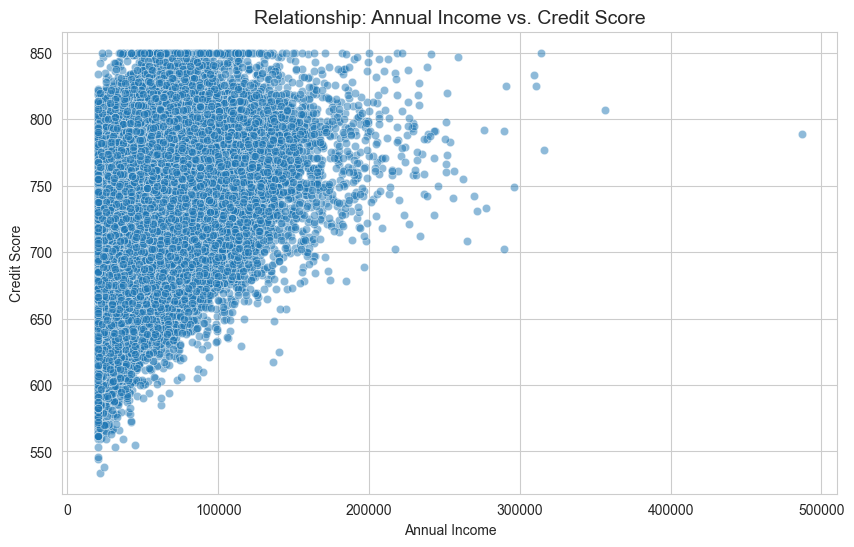

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_income', y='credit_score', data=df, alpha=0.5)
plt.title('Relationship: Annual Income vs. Credit Score', fontsize=14)
plt.xlabel('Annual Income')
plt.ylabel('Credit Score')
plt.show()


Histogram

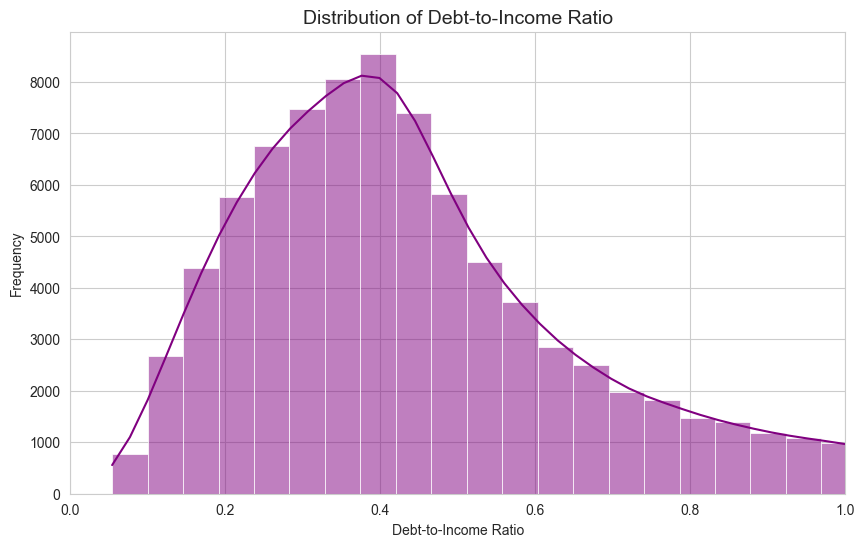

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['debt_to_income_ratio'], bins=100, kde=True, color='purple')
plt.title('Distribution of Debt-to-Income Ratio', fontsize=14)
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Frequency')
plt.xlim(0, 1)
plt.show()


Bar Chart

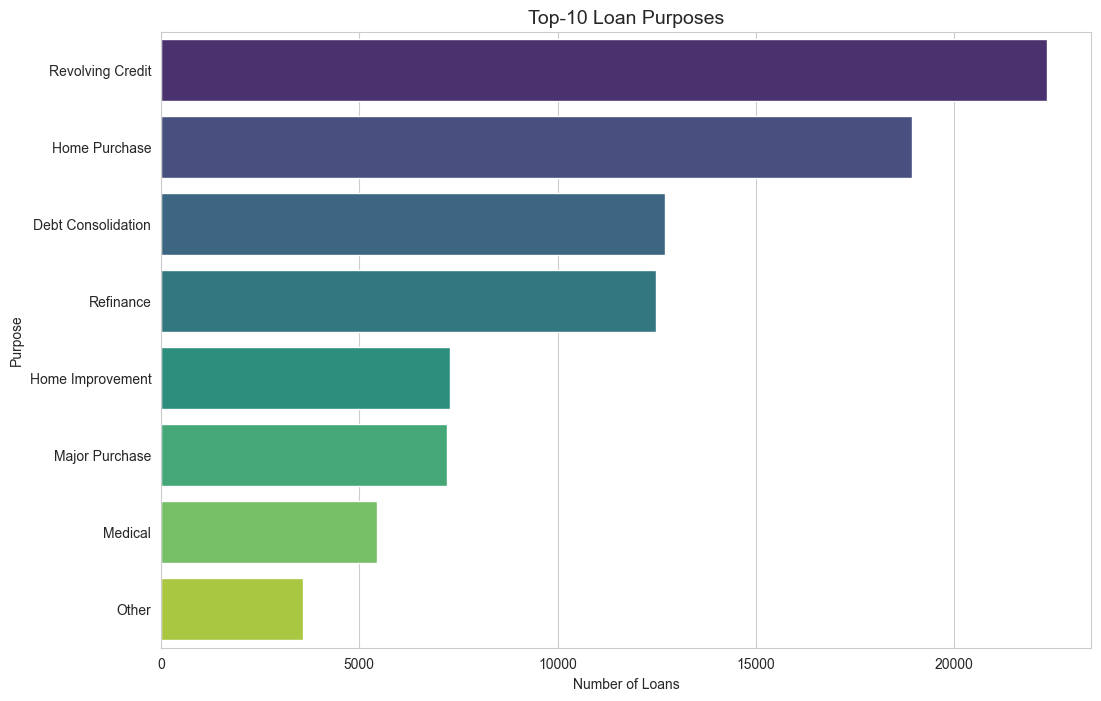

In [ ]:
plt.figure(figsize=(12, 8))
order = df['loan_purpose'].value_counts().index
sns.countplot(y='loan_purpose', data=df, order=order, palette='viridis')
plt.title('Top-10 Loan Purposes', fontsize=14)
plt.xlabel('Number of Loans')
plt.ylabel('Purpose')
plt.show()

Box-Plot


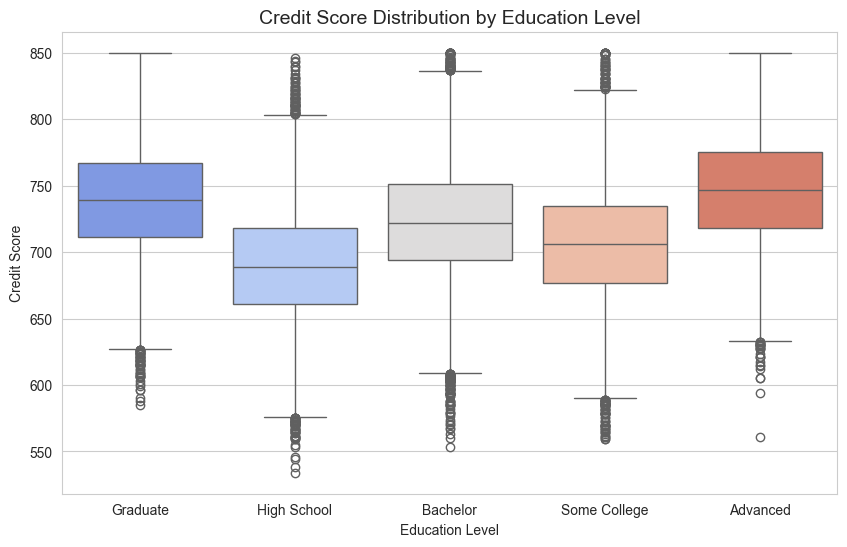

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='education', y='credit_score', data=df, palette='coolwarm')
plt.title('Credit Score Distribution by Education Level', fontsize=14)
plt.xlabel('Education Level')
plt.ylabel('Credit Score')
plt.show()


Corr.map

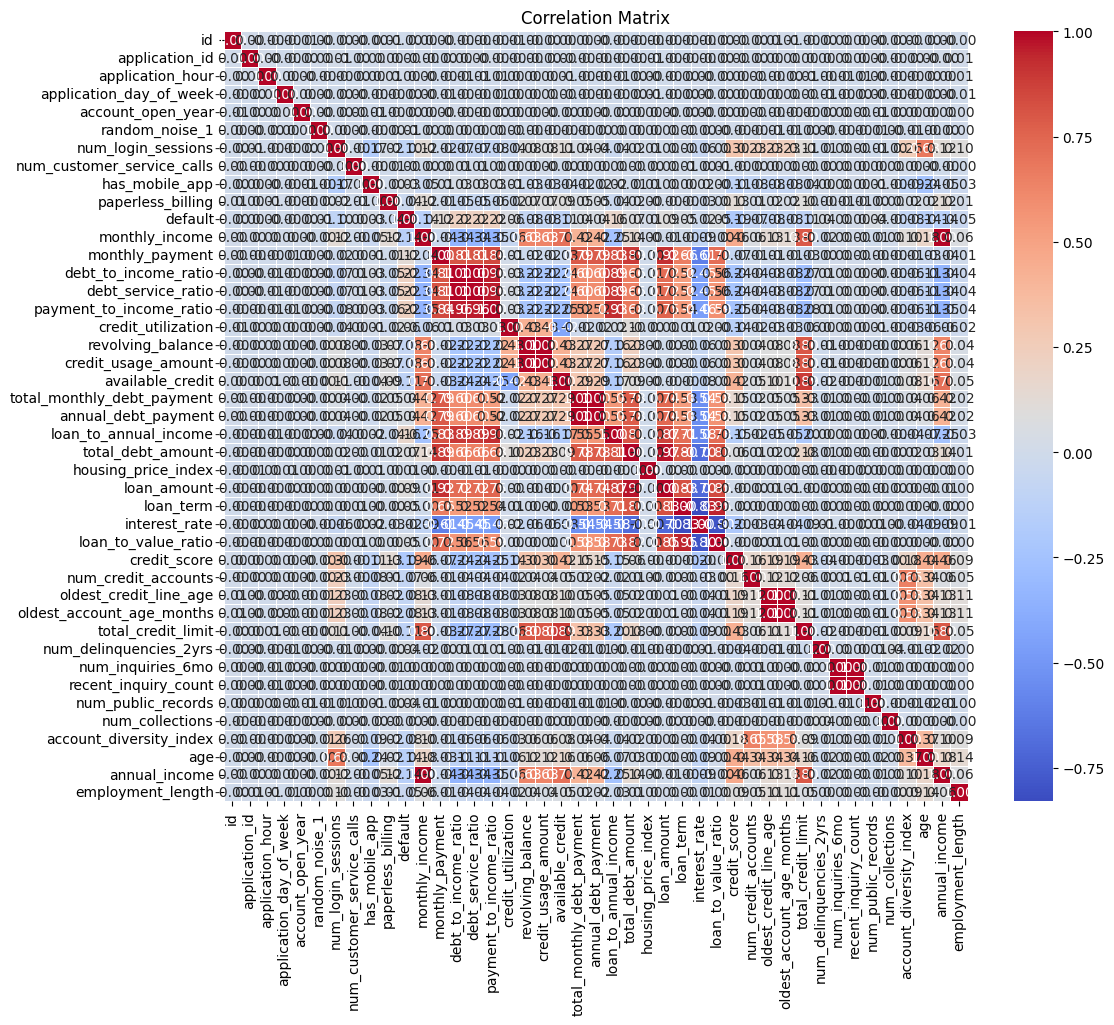

In [21]:
plt.figure(figsize=(12, 10))
numeric_df = df[numeric_columns]
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [23]:
df.head()

,id,application_id,application_hour,application_day_of_week,account_open_year,preferred_contact,referral_code,account_status_code,random_noise_1,num_login_sessions,...,annual_income,employment_length,employment_type,education,marital_status,disposable_income,loan_to_income_ratio,utilization_ratio,oldest_credit_line_years,income_per_age
0,10000,620515,5,6,2013,Email,REF0000,ACT-2,1.137,13,...,61800.0,2.2,full-time,Graduate,Married,3819.23,0.286408,0.841,22.8,1507.317073
1,10001,624978,4,2,2015,Phone,REF0000,ACT-3,-0.165,6,...,28600.0,7.0,full-time,High School,Married,977.26,3.986014,0.971,3.5,752.631579
2,10002,564658,10,3,2020,Phone,REF0000,ACT-3,0.527,1,...,20700.0,0.8,full-time,Bachelor,Single,1203.12,0.449275,0.539,0.0,1150.000000
3,10003,621493,7,5,2010,Email,REF0000,A01,-0.710,4,...,31400.0,4.8,full-time,Bachelor,Single,2093.44,0.277070,0.147,9.0,1162.962963
4,10004,637785,1,2,2020,Email,REF0000,ACT-3,-0.603,6,...,24600.0,5.2,full-time,High School,Single,1466.42,0.292683,0.488,8.0,946.153846


In [24]:
df.to_csv('../data/processed_dataset.csv', index=False)